<a href="https://colab.research.google.com/github/othoni-hub/NSI/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UCO M1-MEEF NSI**

**TP Algorithme des k plus proches voisins**

**Olivier THÖNI** - UCO-IFUCOME (groupes "Mathématiques" et "NSI")

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

*document à l'usage exclusif des personnes un jour actrices (enseignant·es, étudiant·es) du master MEEF NSI de l'UCO*


---


## **Les iris**

<img src="https://www.fleurproshop.com/media/img/pics/original/fleur/product/IRISSET01_G998_02.JPG?type=resize&w=610" width="220" height="180" align = "left"/>

<img src="http://jm-distribution.fr/932-large_default/iris-versicolor.jpg" width="220" height="240" align = "left"/>

<img src="https://s3.amazonaws.com/eit-planttoolbox-prod/media/images/Iris-virginica--Jenny-Evans--CC-BY-NC.jpg" width="220" height="180" align = "left">

### **Le principe de l'algorithme**
L'**algorithme des k plus proches voisins** ("*k-Nearest Neighbors", KNN in english*) est un **classifieur** : il a pour but, littéralement, de répartir une population en **classes**.

C'est un algorithme qui appartient au grand domaine du ***Machine Learning***. 

La **classification** consiste à faire des prédictions sur l'appartenance d'un individu à une classe, chaque classe étant déjà **"étiquetée"** (ou **"labellisée"**), c'est-à-dire que l'on connaît à l'avance les noms des classes. On parle d'**apprentissage supervisé**, par opposition à d'autres algorithmes où les classes ne sont pas étiquetées, les individus étant regroupés parce qu'ils se ressemblent, qui forment l'**"apprentissage non supervisé"**.

Il s'appuie sur l'idée que si deux individus ont des caractéristiques assez proches, il y a quelques chances qu'il appartiennent à la même classe.

Cette notion de "proximité" nécessite que l'on définisse une **distance** (on dit aussi une **métrique**) 
Ici, il s'agira de la **distance euclidienne**, (la même que dans le problème de CAPES) :

**définition : distance euclidienne**

--> Si deux individus $M_1$ et $M_2$, sont mesurés sur $n$ caractéristiques : respectivement $(x_1, x_2, ... , x_n)$ et 
$(y_1, y_2, ... , y_n)$, leur distance euclidienne est donnée par la formule : 

$d(M_1,M_2) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 +...+ (x_n - y_n)^2 }$

Cette formule nécessite que les données soient **normalisées**.
Ici, elles sont toutes données dans la même unité (cm), ce qui pourra suffire. Si ce n'était pas le cas, on utiliserait les outils statistiques de **moyenne** et d'**écart-type** pour les **normaliser**, c'est-à-dire les ramener toutes entre 0 et 1

Pour **"prédire"** la classe d'un individu, on cherchera ses plus proches voisins au sens de cette métrique, en espérant, ce qui le plus souvent le cas, que... "qui se ressemble s'assemble".

* Dans un premier temps, on ne conservera que deux des quatre caractéristiques, choisies (presque) au hasard, tout simplement pour que les choses soient plus faciles à visualiser, 
* puis, en utilisant les outils de *pandas*, une petite étude préalable montrera un choix plus intéressant.
* enfin, nous entraînerons un modèle de prédiction par **apprentissage-machine** (***Machine-learning***)

### **Import des données et des bibliothèques utiles**

On pourrait importer les données depuis un fichier *csv*, mais le module dédié au ***Machine Learning*** *Scikit Learn* met à disposition ce *dataset* très facilement.
Après import, nous allons le disposer dans un *DataFrame pandas*, puis nous constituerons des listes avec les données, afin d'utiliser le moins possible les boîtes noires telle *numpy*, uniquement dans des passages de moindre importance.




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn import datasets

In [ ]:
# import du dataset iris 
iris = datasets.load_iris()
# np.c_ une fonction numpy de concaténation
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Remarque :** codage des espèces (colonne *target*)
* le label 0 correspond aux *iris setosa*
* le label 1 correspond aux *iris versicolor*
* le label 2 correspond aux *iris virginica*


In [ ]:
species = {0 : "setosa", 1 : "versicolor", 2 : "virginica"} # dictionnaire de conversion cible variable nominale --> variable textuelle

### **Description des données (étape incontournable)**

In [ ]:
print("Le dataset comprend " + str(iris_df.shape[0]) + " individus (lignes), et " + str(iris_df.shape[1]) + " variables (colonnes).")

Le dataset comprend 150 individus (lignes), et 5 variables (colonnes).


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**répartition des individus par espèce :**

In [ ]:
repart = iris_df.groupby('target').size()
repart # "repart" est une Series pandas, unidimensionnelle

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [ ]:
print('Le dataset comprend : ')
for k in range(3) :
    print(str(repart[k]) + ' iris ' + species[k])

Le dataset comprend : 
50 iris setosa
50 iris versicolor
50 iris virginica


Avoir un dataset ainsi équilibré permettra d'éviter certains **biais** : lorsque l'algorithme doit retourner une prédiction sur un dataset déséquilibré, en cas de doute, il a tendance à opter pour la réponse la plus fréquente dans le dataset, qui amène moins de risques de se tromper (on personnalise l'algorithme, mais la prédiction n'est rien d'autre que la lecture d'une probabilité).

**Visualisation des données**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.08, 'Pair Plot du dataset ')

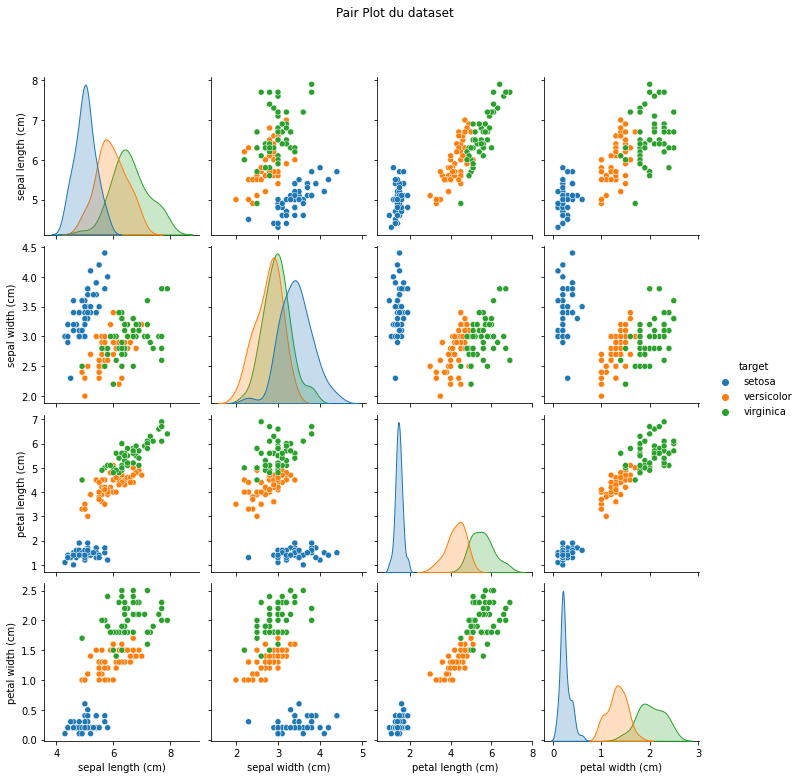

In [ ]:
# Visualiser les relations entre variables, avec code couleur par espèce

before= sns.pairplot(iris_df.replace({'target': species}), hue= 'target')
before.fig.suptitle('Pair Plot du dataset ', y=1.08)

On observe que les *iris setosa* sont plutôt bien séparés des deux autres espèces. Mais *versicolor* et *virginica* ont tendance à avoir des caractéristiques qui se ressemblent : les deux nuages ne sont pas clairement séparés.

**Séparation données x/ cible (*target*) y**

In [ ]:
x= iris_df.iloc[:, :-1]     # toutes les lignes, toutes les colonnes, sauf la dernière
y= iris_df.iloc[:, -1]      # Toutes les lignes de la dernière colonne

**Éclatement du dataset en set d'entraînement et set de test**

On va utiliser 80% des données pour constituer le jeu de données de référence, elles sont choisies au hasard (afin de réduire les biais : imaginez que l'on prenne les 120 premiers individus tels qu'ils se présentent, comme ils sont classés par espèce, on n'aurait que très peu de la 3<sup>ème</sup> espèce dans le jeu d'entraînement, alors que l'on n'aurait que des individus de la 3<sup>ème</sup> espèce dans le jeu de test).

Celles qui restent serviront pour tester l'algorithme des k plus proches voisins : 
* en calculant les distances d'un nouvel individus à tous ceux du set d'entraînement, 
* on va déterminer ses k plus proches voisins, 
* et sur le principe du "vote majoritaire", on prédira la classe de l'individu, que l'on comparera avec sa classe réelle, 
* afin d'étabir un pourcentage d'erreur quand toutes les donnés de test seront passées

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
# Éclatement des données en jeu d'entraînement et jeu de test
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, # choix au hasard pour éviter les biais
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

                                              

### **Étape 1 : Distance euclidienne**


In [ ]:
def distance_euclidienne(x_train, x_test_point):
  """
  Input:
    - x_train: correspondant aux données d'entraînement
    - x_test_point: correspondant au point à tester

  Output:
    -distances: Les distances entre le point à tester et chaque point du set d'entraînement.

  """
  distances= []  # creation d'une liste vide
  for row in range(len(x_train)): # Pour chaque ligne de x_train
      current_train_point= x_train[row]     # Chaque ligne est à tour de rôle le point courant
      distance= 0                           # On initialise la distance à 0

      for col in range(len(current_train_point)): # Pour chaque colonne de la ligne
          
          distance = distance + (current_train_point[col] - x_test_point[col]) **2
          
      distance= np.sqrt(distance)

      distances.append(distance) # Ajout du résultat à la liste des distances

  # Mutation de la liste "distances" en dataframe pandas
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


### **Étape 2 : Recherche des k plus proches voisins**


In [ ]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: les distances entre le point à tester et chaque point du set d'entraînement.
        -K             : le nombre de voisins

    Output:
        -df_nearest: Les k plus proches voisins du point à tester parmi le set d'entraînement.

    """

    # On trie le dataframe distance_point avec la méthode de dataframe ".sort_values(), il s'agit d'un tri en place
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## On nne prend que les K premiers voisins du datafrae trié.
    df_nearest= df_nearest[:K]
    return df_nearest

### **Étape 3 : Prédiction de classification en fonction du "vote majoritaire"**

In [ ]:
from collections import Counter

In [ ]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contenant les k plus proches voisins du point à tester dans le jeu complet de données d'entraînement.
        -y_train: les étiquettes du jeu d'entraînement.

    Output:
        -y_pred: la prédiction basée sur le "vote majoritaire"

    """

    ## Utilise le "Counter" d'objet pour obtenir les étiquette des K plus proches voisins.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Vote majoritaire

    return y_pred

### **Étape 4 : l'algorithme KNN à proprement parler**

In [ ]:
def KNN(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: le set d'entraînement complet
    -y_train: les étiquettes du jeu d'entraînement
    -x_test: le jeu de test complet
    -K: le nombre de voisins

    Output:
    -y_pred: la prédiction pour la totalité du jeu de test basée sur le "vote majoritaire".

    """

    y_pred=[]

    # Boucle sur la totalité du ste de test, pour exécition des étapes 1, 2, 3
    for x_test_point in x_test:
      distance_point  = distance_euclidienne(x_train, x_test_point)     # Étape 1
      df_nearest_point= nearest_neighbors(distance_point, K)    # Étape 2
      y_pred_point    = voting(df_nearest_point, y_train)       # Étape 3
      y_pred.append(y_pred_point)

    return y_pred 

### **Exécution**

In [ ]:
K=3
y_pred = KNN(x_train, y_train, x_test, K)
print(y_pred)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


### **Calcul de l'efficacité**

In [ ]:
from sklearn.metrics import accuracy_score

print("L'efficacité de notre algorithme des k plus proches voisins est de : " +str(accuracy_score(y_test, y_pred)*100) +" %")

L'efficacité de notre algorithme des k plus proches voisins est de : 96.66666666666667 %


In [ ]:
from sklearn.metrics import confusion_matrix

### **Matrice de confusion**

La matrice de confusion récapitule les prédictions en fonctions des valeurs attendues

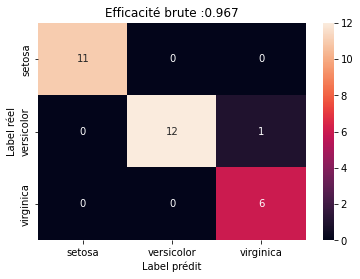

In [ ]:
# Création d'une matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)   # Transformation en dataframe pour affichage plus facile.
matrice_confusion_df = pd.DataFrame(matrice_confusion,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
sns.heatmap(matrice_confusion_df, annot=True)
plt.title('Efficacité brute : {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Label réel')
plt.xlabel('Label prédit')
plt.show()

Au final, une seule erreur où un *iris virginica* a été prédit alors qu'il s'agissait d'un *iris versicolor*.
Ce n'est pas étonnant que l'erreur se fasse ainsi, quand on se souvient que les deux espèces donnait des nuages de points pas très bien séparés...

## **Exploitation en classe de Première NSI**

En première, on peut simplifier le traitement en ne considérant que deux des quatre variables.
En outre, on pourra contourner l'usage des *dataframes pandas* en ne travaillant qu'avec des listes !
Voici une proposition qui va dans ce sens...

http://iamjmm.ovh/NSI/kNN/site/iris.html 
